In [85]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from Test import *
from utilities import *

In [86]:
def cat_Or_dog(y):
    return np.where(y==0, 'cat', 'Dog')

In [87]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # Initialiser les paramètres W et b
    W, b = init(X)
    y = y.reshape((y.shape[0], 1))

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
    
    plt.plot(Loss)
    plt.xlabel("iteration")
    plt.ylabel("error")
    plt.show()
    
    return W, b

In [88]:
X_train, y_train, X_test, y_test = load_data()
y_label = cat_Or_dog(y_train)
X_train_reshape = X_train.reshape(X_train.shape[0], -1)/X_train.max()
X_test_reshape = X_test.reshape(X_test.shape[0], -1)/ X_train.max()

<font size=3 color='red'>
Pour éviter les problèmes comme "overflow encountered in exp", on rajoute un petit $\varepsilon$ dans la fonction logloss

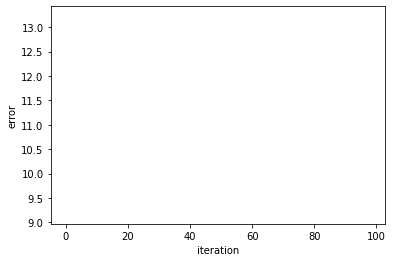

In [89]:
W,b = artificial_neuron(X_train_reshape, y_train)